In [1]:
import h5py as h5
import netCDF4 as nc
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os
import time
from scipy import io

import cv2
import csv
import glob
import math
from tqdm import tqdm
import matplotlib.patches as patches

In [2]:
########## path ##########
data_base = '/media/ubuntu/My Book/UST21/Daily'
save_base = '/media/ubuntu/My Book/Preprocessed/UST21/Chl-a/Ocean'
##########################


######### point #########
x_nak, y_nak = (3377, 3664)
x_sae, y_sae = (3751, 4629)
#########################

In [3]:
def check_pct(arr):
    nans = np.isnan(arr)
    zeros = (arr == 0)
    neg_outlier = (arr < 0)
    pos_outlier = (arr>20)
    assert np.sum(pos_outlier) <1
    count = np.sum(nans) + np.sum(zeros) + np.sum(neg_outlier) +np.sum(pos_outlier)
    #loss rate
    pct = count/(256*256) *10 
    temp_pct = pct*10
    pct = math.floor(pct)*10
    return temp_pct, pct

def save_file(patch, temp, pct, sae=True):
    global save_base
    if pct==100:
        pass
    if temp<1:
        save_path = os.path.join(save_base, 'perfect', img[:-7]+'_sae.tiff' if sae else '_nak.tiff')
        print(save_path)

save_file(s_patch, .5, 2, True)

NameError: name 's_patch' is not defined

In [10]:
img[:-3], img


('UST21_L3_Merged-Chla-1D_20120121', 'UST21_L3_Merged-Chla-1D_20120121.nc')

In [6]:
years = sorted(os.listdir(data_base)[:-2]) #REMOVE TXT FILE
months = [f"{i:02}" for i in range(1, 13)]

for year in years:
    print(year)
    data_year = os.path.join(data_base, year)
    for month in tqdm(months):
        data_month = os.path.join(data_year, str(month))
        if os.path.isdir(data_month):
            imgs = os.listdir(data_month)
            for img in imgs:
                if not 'nc' in img:
                    continue
                path = os.path.join(data_month, img)
                f = nc.Dataset(path,'r')
                a = f['merged_daily_Chl'][:].data
                np_a = np.array(a)
                np_a = np.where(np_a==-999.0, 0, np_a)
                np_a[np_a>20]=0
                n_patch = np_a[x_nak:x_nak+256, y_nak:y_nak+256]
                s_patch = np_a[x_sae:x_sae+256, y_sae:y_sae+256]
                
                #check outliers
                s_temp , s_pct = check_pct(s_patch)
                n_temp , n_pct = check_pct(n_patch)

                if s_pct == 100 : 
                    pass
                else:
                    if s_temp<1:
                        save_path = os.path.join(ocean_base, 'perfect', img[:-3]+'_sae.tiff')
                        cv2.imwrite(save_path, s_patch)
                    save_path = os.path.join(ocean_base, str(s_pct), img[:-3]+'_sae.tiff')
                    cv2.imwrite(save_path, s_patch)

                if n_pct == 100:
                    continue
                else:
                    if n_temp<1:
                        save_path = os.path.join(ocean_base, 'perfect', img[:-3]+'_nak.tiff')
                        cv2.imwrite(save_path, n_patch)
                    save_path = os.path.join(ocean_base, str(n_pct), img[:-3]+'_nak.tiff')
                    cv2.imwrite(save_path, n_patch)

2012


  0%|                                                    | 0/12 [00:04<?, ?it/s]


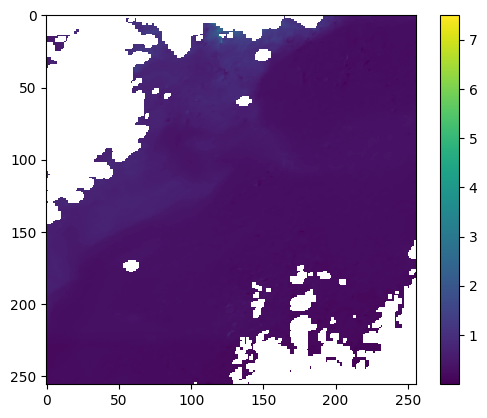

In [55]:
plt.imshow(s_patch)
plt.colorbar()

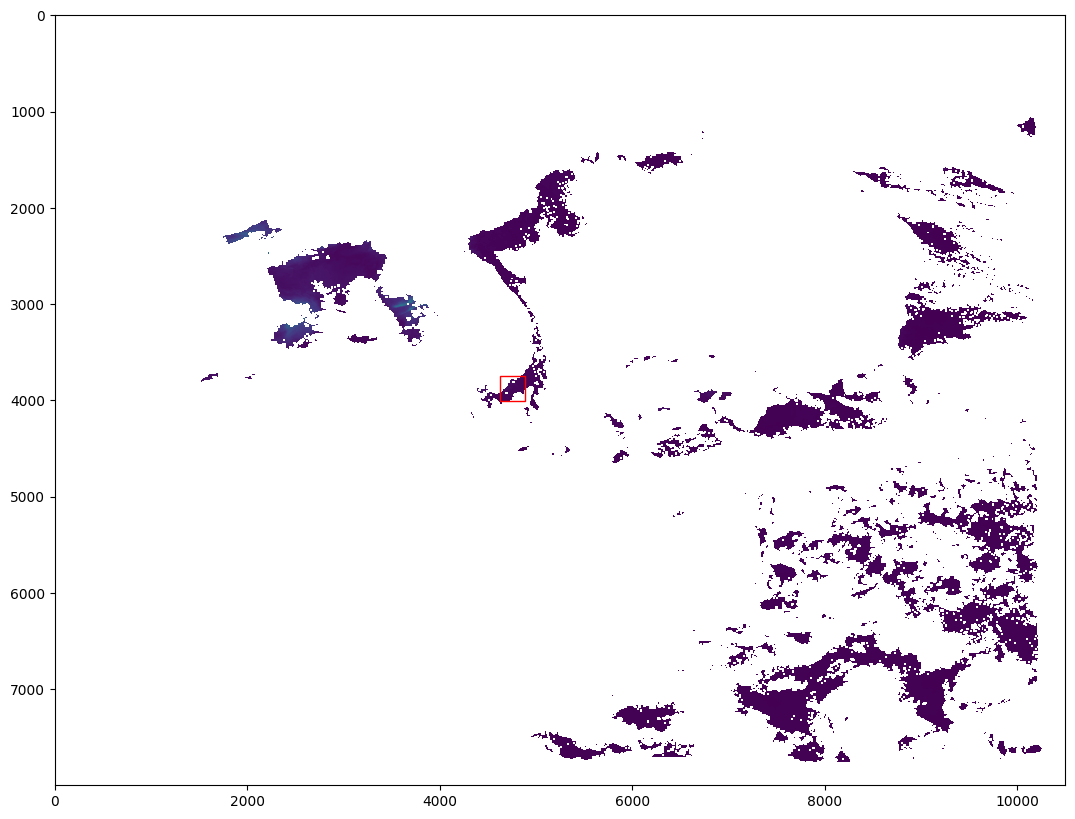

In [56]:
fig, ax = plt.subplots(1, figsize=(15, 10))
ax.imshow(np_a)
rect_nakdong = plt.Rectangle((y_sae, x_sae), 256, 256, edgecolor='red', facecolor='none')
ax.add_patch(rect_nakdong)

In [ ]:

                        #save file
                        if pct == 100 : 
                            continue
                        if temp_pct<1:
                            save_path = os.path.join(save_base, phase, 'perfect', img[:-7] + row_col+'.tiff')
                            cv2.imwrite(save_path, new_arr )#save a .tiff file
                        # np.savetxt(save_path+'/'+ y+'/' +str(pct)+'/'+ i[:-7] + row_col, new_arr, delimiter=",") # save a .txt file
                        save_path = os.path.join(save_base, phase, str(pct), img[:-7] + row_col+'.tiff')
                        cv2.imwrite(save_path, new_arr )#save a .tiff file
                    idx = idx+1
            f.close()
